## STREETS Data 시각화

### import 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [37]:
# 최대 출력할 행 수 설정
pd.set_option('display.max_rows', None)

# 최대 출력할 열 수 설정
pd.set_option('display.max_columns', None)

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [39]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 나눔글꼴 경로 설정
# font_path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/font/NanumGothic-Regular.ttf'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

### 과제 1 : 시간에 따른 교통 사고의 타입별 추치화 x 축 시간 y축 사건 타입 4가지(꺽은선 그래프)

In [40]:
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

df = pd.read_excel(path)


In [41]:
df.head(10)

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,startcrossstreet,endcrossstreet,responsestart,createtime
0,929916,Stall,I94,3,1,IL-60 (Town Line Rd),IL-60 (Town Line Rd),NaT,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,Old US Hwy 41,Old US Hwy 41,NaT,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,Casey Rd,Casey Rd,NaT,2018-08-20 00:07:39
3,929919,Other,I94,4,1,Everett Rd,Everett Rd,NaT,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 00:29:31
5,929921,Stall,I94,3,1,IL-120 (Belvidere Rd),IL-120 (Belvidere Rd),NaT,2018-08-20 00:39:43
6,929922,Fire,Unknown,0,3,NaN,NaN,NaT,2018-08-20 00:41:39
7,929923,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 00:59:31
8,929924,Fire,Washington St,3,3,Hainesville Rd,Hainesville Rd,NaT,2018-08-20 01:05:39
9,929925,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 01:29:31


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   startcrossstreet    7584 non-null   object        
 6   endcrossstreet      7584 non-null   object        
 7   responsestart       1574 non-null   datetime64[ns]
 8   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 882.1+ KB


#### 총 9개의 컬럼으로 구성
#### 12543개의 행으로 구성
#### 날짜는 8월 20일 부터 9월 20일까지로 구성
#### 해당 데이터의 null 값을 갖는 행의 수 :
#### 해당 데이터의 null 값을 갖는 열의 수 :
#### 해당 데이터를 이용해서 예측하는 모델을 만드는 것도 재미있을 듯

## df.iloc -> 행번호, 열번호

In [43]:
# df.iloc[행번호, 열번호]


df.iloc[1,1]

'Accident'

### 수치형 변수와 범주형 변수를 출력하기

In [44]:
df.select_dtypes(exclude=object).columns

Index(['eventid', 'roaddirection', 'MaxOftrafficimpact', 'responsestart',
       'createtime'],
      dtype='object')

In [45]:
df.select_dtypes(include=object).columns

Index(['eventtype', 'road', 'startcrossstreet', 'endcrossstreet'], dtype='object')

In [46]:
df.describe()

,eventid,roaddirection,MaxOftrafficimpact,responsestart,createtime
count,12543.000000,12543.000000,12543.000000,1574,12543
mean,935674.119031,1.869409,1.928167,2018-09-04 12:37:18.970139904,2018-09-04 17:12:22.427888128
min,929916.000000,0.000000,0.000000,2018-08-20 06:01:35,2018-08-20 00:03:30
25%,932779.500000,1.000000,1.000000,2018-08-27 15:21:48.750000128,2018-08-28 08:32:02.500000
50%,935683.000000,2.000000,2.000000,2018-09-05 07:27:07.500000,2018-09-04 15:29:31
75%,938564.500000,3.000000,3.000000,2018-09-12 16:16:15,2018-09-12 10:40:40
max,958076.000000,4.000000,4.000000,2018-09-20 17:55:57,2018-09-20 23:33:39
std,3347.696768,1.460207,0.941702,NaN,NaN


In [47]:
import pandas as pd
import seaborn as sns


# 널 값이 존재하는 행의 수
null_rows = df[df.isnull().any(axis=1)].shape[0]

# 널 값이 존재하는 열의 수
null_cols = df.isnull().sum()[df.isnull().sum() > 0].shape[0]

print(f"널 값이 존재하는 행의 수: {null_rows}")
print(f"널 값이 존재하는 열의 수: {null_cols}")



널 값이 존재하는 행의 수: 11199
널 값이 존재하는 열의 수: 4


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   startcrossstreet    7584 non-null   object        
 6   endcrossstreet      7584 non-null   object        
 7   responsestart       1574 non-null   datetime64[ns]
 8   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 882.1+ KB


In [49]:
df.columns

Index(['eventid', 'eventtype', 'road', 'roaddirection', 'MaxOftrafficimpact',
       'startcrossstreet', 'endcrossstreet', 'responsestart', 'createtime'],
      dtype='object')

### 각 열별 널 값의 수 계산

In [50]:
# 각 열별 널 값의 수 계산
null_counts = df.isnull().sum()

print(null_counts)

eventid                   0
eventtype                 0
road                    863
roaddirection             0
MaxOftrafficimpact        0
startcrossstreet       4959
endcrossstreet         4959
responsestart         10969
createtime                0
dtype: int64


### 각 열별 NULL 값을 통한 insight는 responsestart 같은 경우는 null이 많아서 처리 불가능 -> 삭제

### 추가적으로 사고 시작과 사고끝은 크게 의미없으니까 하지말자

In [51]:
drop_df = df.drop(columns= ["startcrossstreet","endcrossstreet","responsestart" ])

### null 값이 약 50% 정도가 되고 데이터를 시각화 하는데 크게 중요하지 않기 때문에 제외시킴["startcrossstreet","endcrossstreet","responsestart" ]

In [52]:
drop_df.head()

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,2018-08-20 00:29:31


In [53]:
drop_df.isnull().sum()

eventid                 0
eventtype               0
road                  863
roaddirection           0
MaxOftrafficimpact      0
createtime              0
dtype: int64

In [54]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 588.1+ KB


In [55]:
import pandas as pd

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'eventtype' 열의 고유 값과 그 빈도수
eventtype_values = df['eventtype'].value_counts()
print("eventtype 열의 고유 값과 빈도수:")
print(eventtype_values)

# 'road' 열의 고유 값과 그 빈도수
road_values = df['road'].value_counts()
print("\nroad 열의 고유 값과 빈도수:")
print(road_values)


eventtype 열의 고유 값과 빈도수:
eventtype
Accident           4423
Stall              1830
Debris             1687
Fire               1347
Incident           1222
Other               885
Weather             864
Signal Flash        109
Signal Out           85
Roadwork             52
Congestion           17
Police Activity      11
Signing Only          8
Special Event         3
Name: count, dtype: int64

road 열의 고유 값과 빈도수:
road
Unknown                           2988
I94                               1983
Lake-Cook Rd                       320
US Hwy 41                          319
IL Rte 120                         272
US Hwy 45                          263
IL Rte 83                          244
US Hwy 12                          232
IL Rte 21                          223
IL Rte 60                          208
Washington St                      200
IL Rte 22                          172
IL Rte 176                         170
Il Rte 132                         160
IL Rte 173                       

<!-- eventtype 열의 고유 값과 빈도수:
eventtype
Accident           4423
Stall              1830
Debris             1687
Fire               1347
Incident           1222
Other               885
Weather             864
Signal Flash        109
Signal Out           85
Roadwork             52
Congestion           17
Police Activity      11
Signing Only          8
Special Event         3 -->

## 1. 시간에 따른 사고의 타입별 수치화 x 축 시간 y축 사건 타입 4가지(꺽은선 그래프)

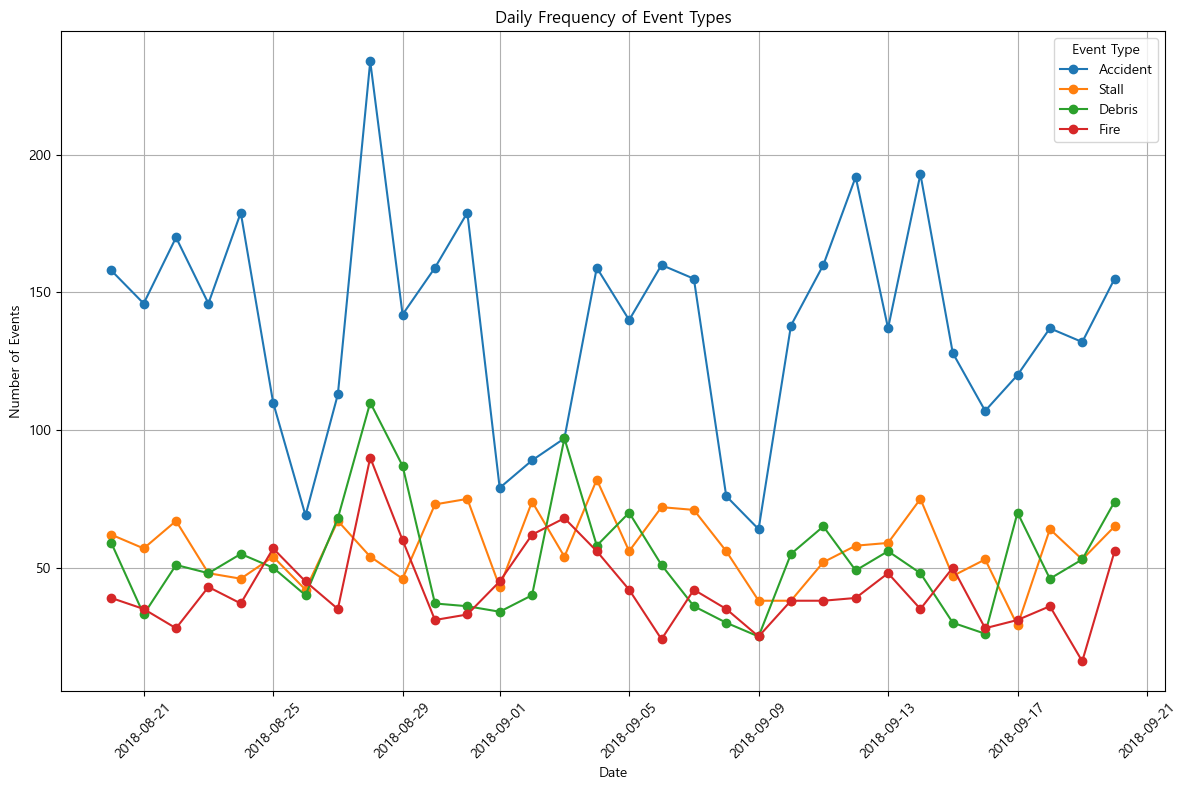

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 사건 타입과 날짜로 그룹화하여 카운트 계산
daily_counts = df.groupby([df['createtime'].dt.date, 'eventtype']).size().unstack(fill_value=0)

# 주요 사건 타입 선택
selected_types = ['Accident', 'Stall', 'Debris', 'Fire']

# 해당 사건 타입만 필터링
daily_counts = daily_counts[selected_types]

# 시각화
plt.figure(figsize=(12, 8))
for event_type in selected_types:
    plt.plot(daily_counts.index, daily_counts[event_type], marker='o', label=event_type)

plt.title('Daily Frequency of Event Types')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Event Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


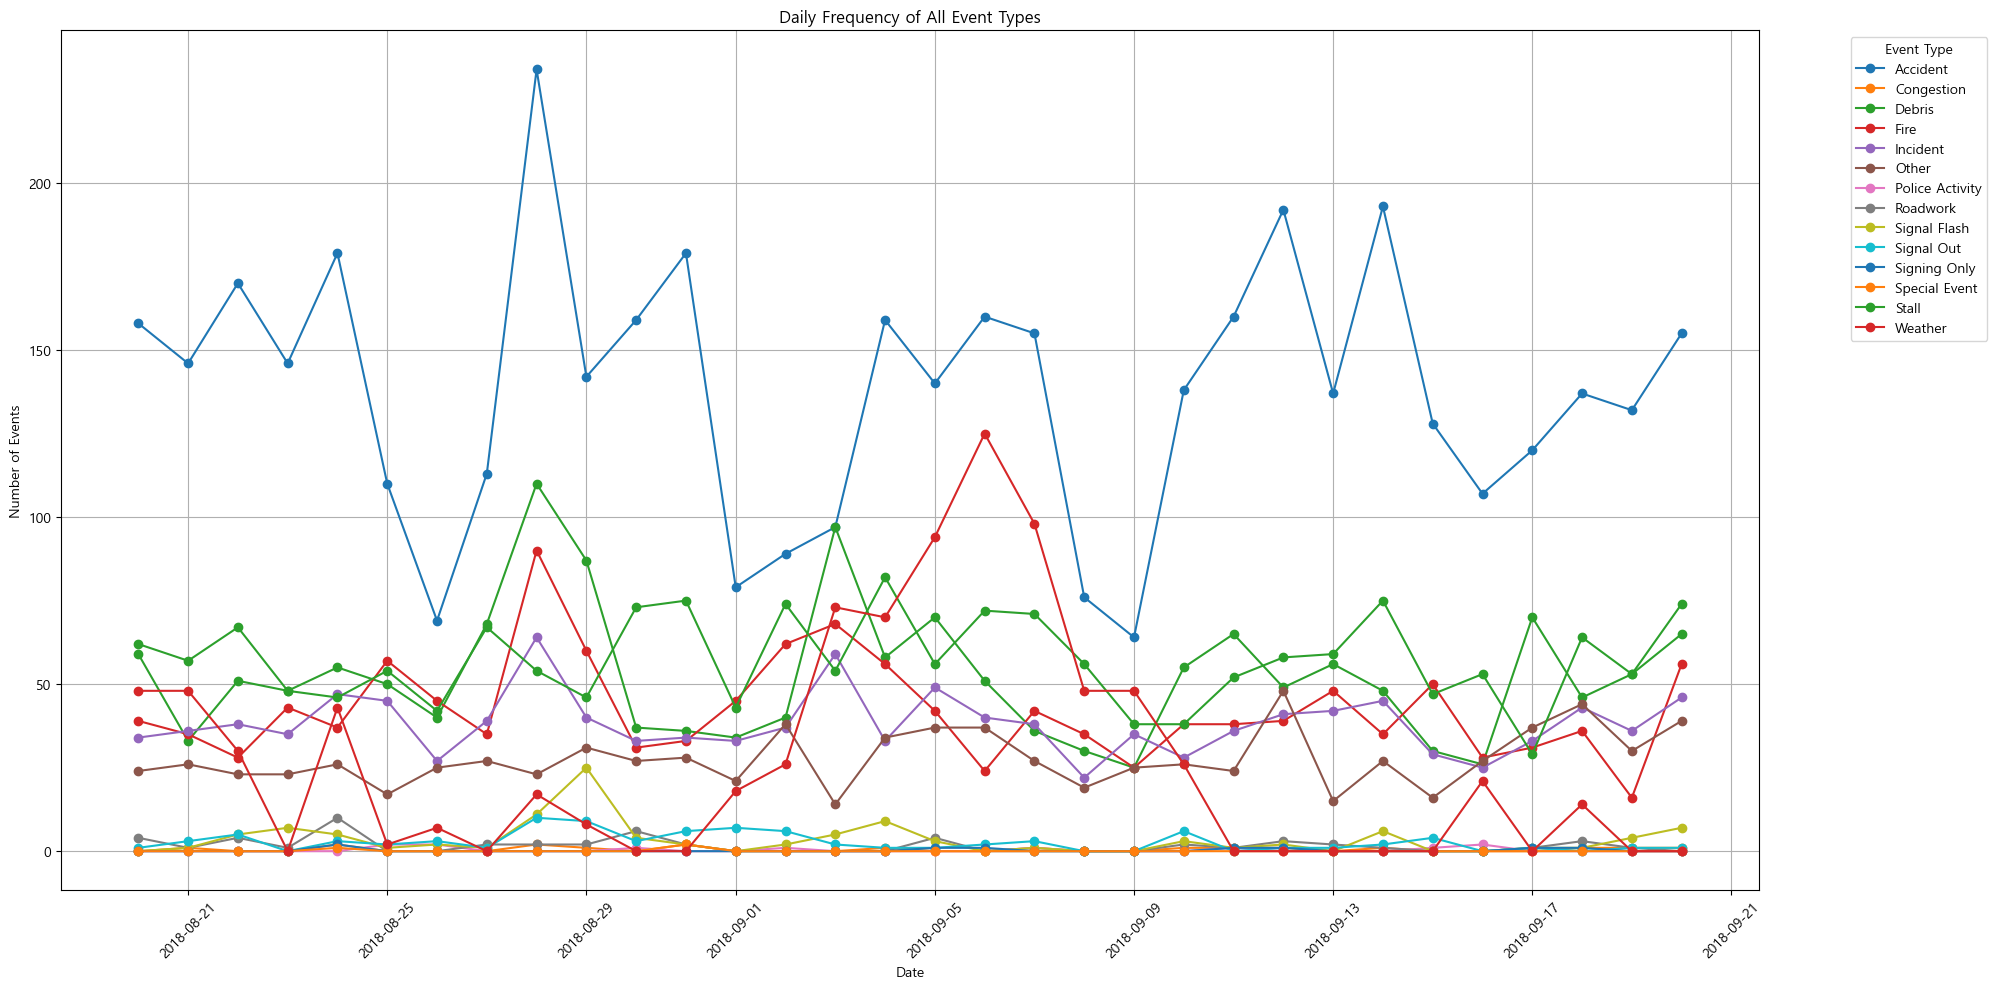

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 사건 타입과 날짜로 그룹화하여 카운트 계산
daily_counts = df.groupby([df['createtime'].dt.date, 'eventtype']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(20, 10))
for event_type in daily_counts.columns:
    plt.plot(daily_counts.index, daily_counts[event_type], marker='o', label=event_type)

plt.title('Daily Frequency of All Event Types')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 과제 2  : 시간에 따른 교통 사고 수치화 x축 시간(00시 04시 08시 12시 16시 20시 00시)(일 평균내기), y축 사건 발생 수 ( bar 차트)

In [29]:
"""이 데이터는 STREETS 데이터셋의 일부로 보이며, 교통 관련 사건 및 사고의 유형별 발생 횟수를 나타냅니다. 각 항목은 특정 유형의 사건이나 사고가 기록된 횟수를 보여주고, 이를 통해 해당 지역에서 어떤 종류의 문제가 더 자주 발생하는지 파악할 수 있습니다. 각 이벤트 유형별로 설명드리겠습니다:

1. **Accident (사고)**: 4423건 - 자동차 사고와 같은 교통 사고가 발생한 횟수입니다.
2. **Stall (고장)**: 1830건 - 차량 고장이 도로 위에서 발생한 경우의 수입니다.
3. **Debris (잔해)**: 1687건 - 도로 위에 잔해나 파편이 있어 교통에 영향을 준 경우의 수입니다.
4. **Fire (화재)**: 1347건 - 차량 화재 또는 도로 근처 화재 사건의 수입니다.
5. **Incident (사건)**: 1222건 - 교통 사고를 제외한 다양한 사건들이 포함됩니다.
6. **Other (기타)**: 885건 - 위의 카테고리에 속하지 않는 기타 사건들입니다.
7. **Weather (날씨)**: 864건 - 날씨 조건으로 인한 교통 사건의 수입니다. 예를 들어 폭설, 폭우, 안개 등이 이에 해당됩니다.
8. **Signal Flash (신호등 깜박임)**: 109건 - 신호등의 기능 이상으로 깜박이는 경우의 수입니다.
9. **Signal Out (신호등 고장)**: 85건 - 신호등 고장으로 인한 사건 수입니다.
10. **Roadwork (도로 공사)**: 52건 - 도로 공사로 인한 교통 방해 사건의 수입니다.
11. **Congestion (정체)**: 17건 - 교통 정체 관련 사건의 수입니다.
12. **Police Activity (경찰 활동)**: 11건 - 경찰 활동과 관련된 사건 수입니다. 예를 들어 교통 단속이나 사고 현장에서의 경찰 활동이 포함될 수 있습니다.
13. **Signing Only (표지판 관련)**: 8건 - 도로 표지판과 관련된 사건 수입니다.
14. **Special Event (특별 행사)**: 3건 - 특별 행사로 인해 발생한 교통 사건의 수입니다.

이러한 데이터는 해당 지역의 교통 안전 개선을 위한 정책 수립, 리소스 배분, 사고 예방 전략 개발에 중요한 정보를 제공할 수 있습니다."""

'이 데이터는 STREETS 데이터셋의 일부로 보이며, 교통 관련 사건 및 사고의 유형별 발생 횟수를 나타냅니다. 각 항목은 특정 유형의 사건이나 사고가 기록된 횟수를 보여주고, 이를 통해 해당 지역에서 어떤 종류의 문제가 더 자주 발생하는지 파악할 수 있습니다. 각 이벤트 유형별로 설명드리겠습니다:\n\n1. **Accident (사고)**: 4423건 - 자동차 사고와 같은 교통 사고가 발생한 횟수입니다.\n2. **Stall (고장)**: 1830건 - 차량 고장이 도로 위에서 발생한 경우의 수입니다.\n3. **Debris (잔해)**: 1687건 - 도로 위에 잔해나 파편이 있어 교통에 영향을 준 경우의 수입니다.\n4. **Fire (화재)**: 1347건 - 차량 화재 또는 도로 근처 화재 사건의 수입니다.\n5. **Incident (사건)**: 1222건 - 교통 사고를 제외한 다양한 사건들이 포함됩니다.\n6. **Other (기타)**: 885건 - 위의 카테고리에 속하지 않는 기타 사건들입니다.\n7. **Weather (날씨)**: 864건 - 날씨 조건으로 인한 교통 사건의 수입니다. 예를 들어 폭설, 폭우, 안개 등이 이에 해당됩니다.\n8. **Signal Flash (신호등 깜박임)**: 109건 - 신호등의 기능 이상으로 깜박이는 경우의 수입니다.\n9. **Signal Out (신호등 고장)**: 85건 - 신호등 고장으로 인한 사건 수입니다.\n10. **Roadwork (도로 공사)**: 52건 - 도로 공사로 인한 교통 방해 사건의 수입니다.\n11. **Congestion (정체)**: 17건 - 교통 정체 관련 사건의 수입니다.\n12. **Police Activity (경찰 활동)**: 11건 - 경찰 활동과 관련된 사건 수입니다. 예를 들어 교통 단속이나 사고 현장에서의 경찰 활동이 포함될 수 있습니다.\n13. **Signing Only (표지판 관련)**: 8건 - 도로 표지판과 관련된 사건 수입니다.\n14.

C:\Users\khds0\AppData\Local\Temp\ipykernel_19184\3385586431.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
findfont: Font family '맑은 고딕' not found.
c:\Users\khds0\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


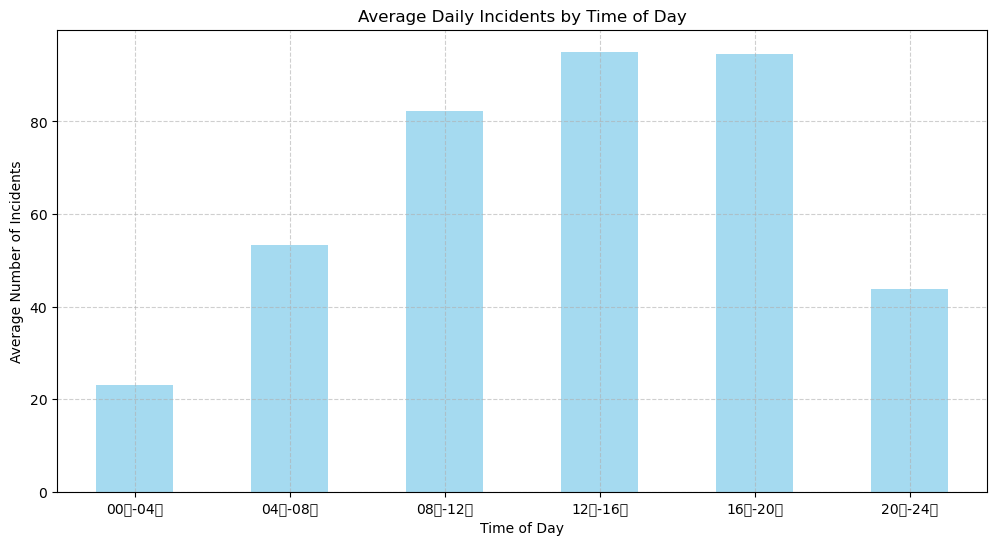

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 시간대를 기반으로 구간 설정 (00시, 04시, 08시, 12시, 16시, 20시, 24시)
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['00시-04시', '04시-08시', '08시-12시', '12시-16시', '16시-20시', '20시-24시']
df['time_bin'] = pd.cut(df['createtime'].dt.hour, bins=bins, labels=labels, right=False, include_lowest=True)

# 일별 및 시간대별로 그룹화하여 사건 수 집계
grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)

# 일 평균 사건 발생 수 계산
daily_average = grouped.mean()

# 시각화
daily_average.plot(kind='bar', figsize=(12, 6), color='skyblue', alpha=0.75)
plt.title('Average Daily Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Incidents')
plt.xticks(rotation=0)  # X축 라벨 회전 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


##  1시간 단위로 박스 plot 으로 그리기

C:\Users\khds0\AppData\Local\Temp\ipykernel_19184\231859721.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)


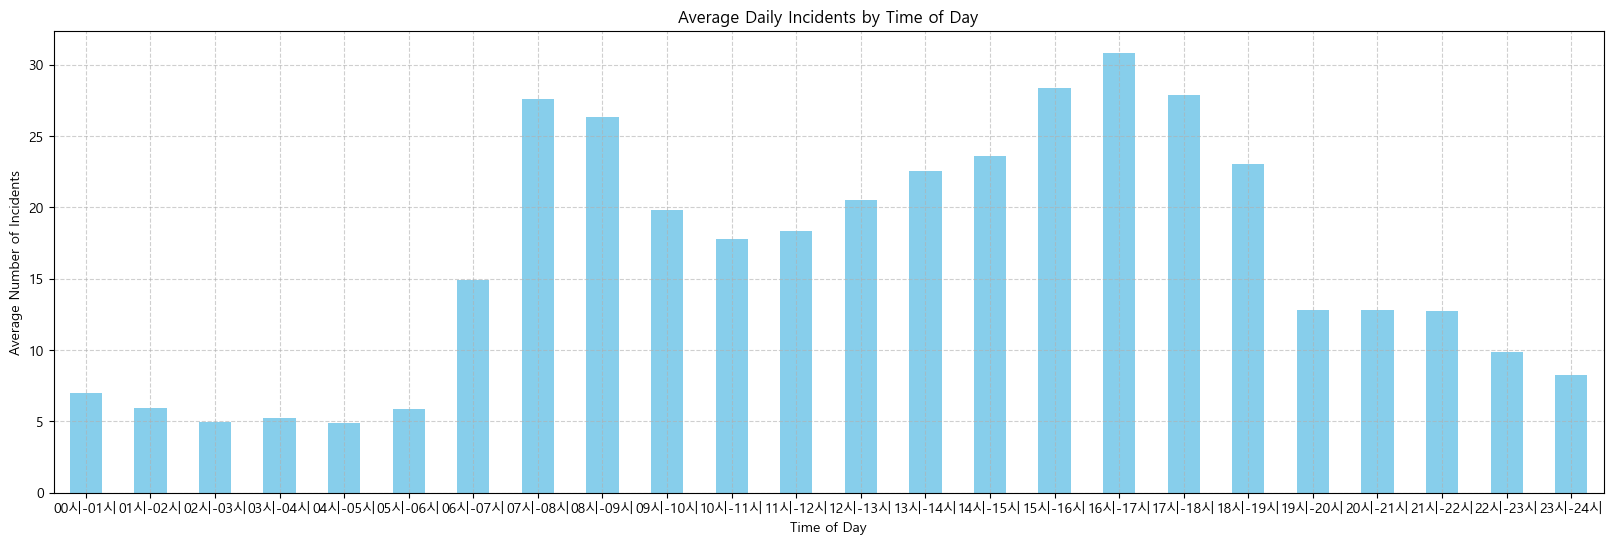

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 시간대를 기반으로 구간 설정 (00시, 04시, 08시, 12시, 16시, 20시, 24시)
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

labels = ['00시-01시', '01시-02시','02시-03시','03시-04시',
          '04시-05시', '05시-06시','06시-07시','07시-08시',
          '08시-09시', '09시-10시', '10시-11시','11시-12시',
          '12시-13시', '13시-14시','14시-15시','15시-16시',
          '16시-17시', '17시-18시','18시-19시','19시-20시',
          '20시-21시','21시-22시', '22시-23시','23시-24시']


df['time_bin'] = pd.cut(df['createtime'].dt.hour, bins=bins, labels=labels, right=False, include_lowest=True)

# 일별 및 시간대별로 그룹화하여 사건 수 집계
grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)

# 일 평균 사건 발생 수 계산 -> 일 평균 이벤트 타입별 시각화 
"""eventtype
Accident           4423
Stall              1830
Debris             1687
Fire               1347
Incident           1222
Other               885
Weather             864
Signal Flash        109
Signal Out           85
Roadwork             52
Congestion           17
Police Activity      11
Signing Only          8
Special Event         3"""
daily_average = grouped.mean()

# 시각화
daily_average.plot(kind='bar', figsize=(20, 6), color='skyblue')
plt.title('Average Daily Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Incidents')
plt.xticks(rotation=0)  # X축 라벨 회전 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\khds0\AppData\Local\Temp\ipykernel_6656\1271201698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['hour'] = accidents['createtime'].dt.hour


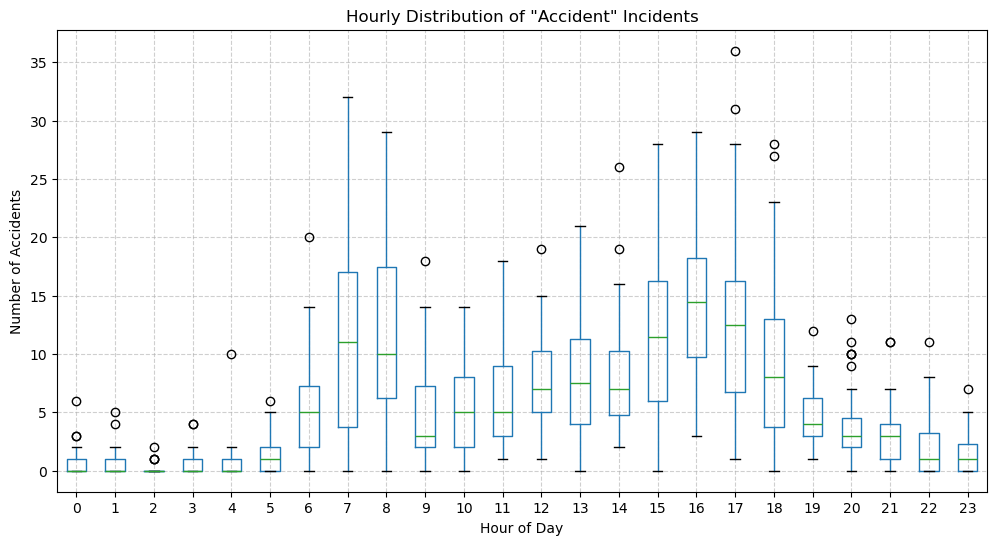

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident']

# 시간별로 그룹화하여 사건 수 집계
accidents['hour'] = accidents['createtime'].dt.hour

# 시간별로 그룹화
hourly_group = accidents.groupby(['hour', accidents['createtime'].dt.date]).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(12, 6))
hourly_group.T.boxplot()
plt.title('Hourly Distribution of "Accident" Incidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.show()


박스플롯(Boxplot)은 데이터의 분포와 이상치를 시각적으로 표현하기 위한 통계 도구입니다. 박스플롯에 나타나는 주요 수학적 범주들은 다음과 같습니다.

### 1. 중앙값 (Median, Q2)
- 박스플롯의 박스를 나누는 중앙의 선은 데이터의 중앙값(또는 2사분위수, Q2)을 나타냅니다.
- 이는 데이터의 중앙에 위치한 값으로, 데이터의 절반이 이 값 이하, 절반이 이 값 이상에 위치합니다.

### 2. 1사분위수 (First Quartile, Q1)
- 박스의 아래쪽 경계선은 1사분위수(Q1)로, 데이터의 하위 25% 지점을 나타냅니다.
- 이는 데이터의 25%가 이 값 이하에 위치한다는 의미입니다.

### 3. 3사분위수 (Third Quartile, Q3)
- 박스의 위쪽 경계선은 3사분위수(Q3)로, 데이터의 상위 75% 지점을 나타냅니다.
- 이는 데이터의 75%가 이 값 이하에 위치한다는 의미입니다.

### 4. IQR (Interquartile Range, 사분위 범위)
- IQR은 데이터의 중간 50%를 포함하는 구간의 길이로, \( IQR = Q3 - Q1 \)로 정의됩니다.
- 박스의 높이는 IQR을 나타내며, 이는 데이터의 중심 부분에 대한 분산 정도를 보여줍니다.

### 5. 이상치 (Outliers)
- 이상치는 박스플롯의 수염(whisker) 바깥쪽에 위치한 점들로, 일반적으로 **1.5 × IQR** 범위 바깥에 있는 값들입니다.
- 이상치 범위는 다음과 같습니다:
  - 하한: \( Q1 - 1.5 \times IQR \)
  - 상한: \( Q3 + 1.5 \times IQR \)
- 이 범위 밖의 데이터는 이상치로 간주하며, 박스플롯의 바깥에 작은 점이나 동그라미로 표시됩니다.

### 6. 수염 (Whiskers)
- 수염은 데이터의 최소값과 최대값 범위 내에서 이상치를 제외한 값을 나타냅니다.
- 수염의 끝은 **1.5 × IQR** 이내에 위치한 최솟값과 최댓값입니다.



-----------------------------------------------------------------



1. **중앙값**: 대부분의 시간대에서 중앙값은 박스의 중간에 위치한 선으로 나타납니다. 이 값은 해당 시간대의 사고 건수의 중앙값을 나타내며, 오전 7시, 오후 3시, 오후 5시, 오후 6시 등에 사고 발생 건수가 상대적으로 높습니다.

2. **사분위수 (IQR)**: 박스는 각 시간대의 사고 건수 분포를 나타내며, 아래 경계는 1사분위수(Q1), 위 경계는 3사분위수(Q3)를 나타냅니다. 박스의 크기가 클수록 해당 시간대의 사고 발생 변동이 크다는 것을 의미합니다. 예를 들어, **오전 7시, 오후 3시, 오후 5시, 오후 6시**에 박스의 높이가 큼을 통해 해당 시간대의 사고 건수 분포가 넓고, 사고 발생 변동성이 높다는 것을 알 수 있습니다.

3. **수염(Whiskers)**: 수염은 1.5 × IQR 범위 안에 있는 데이터의 최대, 최소값을 나타냅니다. 예를 들어, **오전 7시, 오후 3시, 오후 6시**의 수염이 긴 편이어서 이 시간대는 다양한 사고 건수를 보이는 것을 의미합니다.

4. **이상치(Outliers)**: 점으로 표시된 값은 이상치로, 해당 시간대에서 발생 건수가 평균보다 현저히 많거나 적은 경우를 나타냅니다. 특히 **오전 7시, 오후 6시, 오후 7시**에는 이상치가 많이 존재하여 특정 날의 사고 발생이 매우 많았던 경우가 있었음을 알 수 있습니다.

5. **시간대별 패턴**: 일반적으로 **오전 6시부터 오전 9시, 오후 3시부터 오후 7시** 사이에 사고 발생이 많아지는 경향을 보입니다. 이는 아침 출근 시간과 저녁 퇴근 시간에 사고가 많이 발생할 가능성이 높다는 것을 시사합니다.

### 요약
- **사고 발생이 가장 많고 변동이 큰 시간대**: 오전 7시, 오후 3시, 오후 5시, 오후 6시.
- **사고 발생이 적은 시간대**: 새벽(0시~5시) 및 늦은 저녁(21시 이후).
- **출퇴근 시간대**에 사고 발생 건수가 많아지고, 사고 발생의 변동성도 커지는 경향이 있습니다. 

이 플롯은 특정 시간대에 사고 예방 조치를 강화하는 등의 정책 수립에 유용한 정보를 제공합니다.

 ### x축 요일 y축 사고별 숫자 : 요일별로 사건이 많이 발생하는 것을 확인하기 위해서

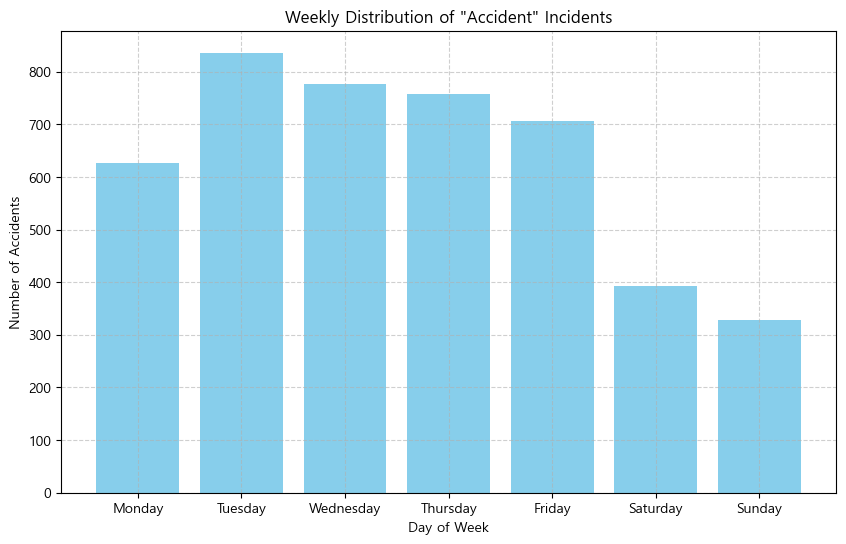

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident'].copy()

# 요일 추가 (0=월요일, 6=일요일)
accidents['day_of_week'] = accidents['createtime'].dt.dayofweek

# 요일별 사고 건수 집계
weekly_accidents = accidents.groupby('day_of_week').size()

# 요일별 레이블 설정
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(weekly_accidents.index, weekly_accidents.values, color='skyblue')
plt.title('Weekly Distribution of "Accident" Incidents')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(7), labels=days)  # 0-6에 요일 레이블 추가
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


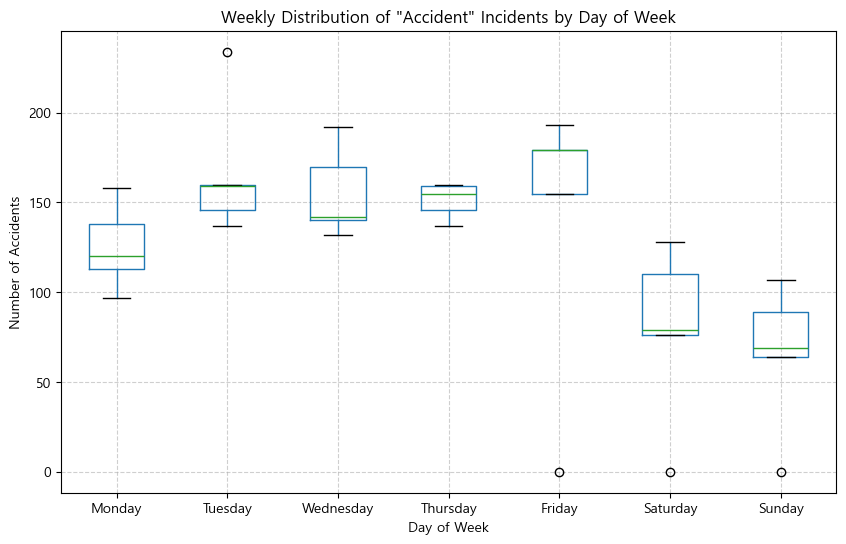

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident'].copy()

# 요일 추가 (0=월요일, 6=일요일)
accidents['day_of_week'] = accidents['createtime'].dt.dayofweek

# 데이터셋을 요일별로 그룹화하여 각 요일에 대해 주별 사고 건수 계산
accidents['week'] = accidents['createtime'].dt.isocalendar().week
weekly_accidents = accidents.groupby(['day_of_week', 'week']).size().unstack(fill_value=0)

# 요일별 박스플롯 그리기
plt.figure(figsize=(10, 6))
weekly_accidents.T.boxplot()
plt.title('Weekly Distribution of "Accident" Incidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 8), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


이 박스플롯은 요일별로 주간 사고 건수의 분포를 시각적으로 보여주고 있습니다. x축은 요일을, y축은 사고 건수를 나타내며, 각 요일의 박스는 사고 건수의 분포와 변동성을 시각화합니다.

### 주요 해석

1. **중앙값 (Median)**:
   - 박스 내 중앙의 선은 각 요일의 중앙값을 나타냅니다. 전반적으로 모든 요일에 걸쳐 비슷한 중앙값을 보이지만, 약간의 차이가 있습니다.
   - **화요일**과 **수요일**의 중앙값이 상대적으로 높아, 이 요일에 사고가 평균적으로 더 많이 발생하는 경향이 있음을 알 수 있습니다.

2. **사분위수 (IQR)**:
   - 각 박스의 아래쪽 경계선은 1사분위수(Q1), 위쪽 경계선은 3사분위수(Q3)로, 데이터의 중간 50% 범위를 나타냅니다.
   - **토요일**과 **수요일**의 IQR(박스 높이)이 넓어, 이들 요일의 사고 발생 변동성이 크다는 것을 보여줍니다. 반면, **목요일**은 IQR이 상대적으로 작아 변동성이 낮습니다.

3. **이상치 (Outliers)**:
   - 그래프의 점들은 이상치를 나타내며, 일반적인 데이터 범위(1.5 × IQR)를 벗어난 값입니다.
   - **화요일**에 한 개의 높은 이상치가 존재하여, 특정 주에는 다른 주보다 사고 건수가 매우 높았던 것으로 보입니다.
   - **토요일**과 **일요일**의 하단에도 몇 개의 낮은 이상치가 존재하는데, 이는 특정 주에 사고 건수가 매우 낮았음을 의미합니다.

4. **요일별 패턴**:
   - **화요일**과 **수요일**의 사고 건수가 비교적 높으며, 변동성도 큰 편입니다.
   - **금요일과 토요일**은 상대적으로 낮은 중앙값을 가지지만, 토요일은 사고 건수의 분포가 넓어 변동성이 큽니다.
   - **일요일**은 전체적으로 낮은 사고 건수를 보이며, 주별 사고 변동성이 적습니다.



## 화요일에 대해서만 데이터를 필터링하여 1시간 간격으로 시간별 사건 수를 박스플롯

C:\Users\khds0\AppData\Local\Temp\ipykernel_19184\2940871059.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour


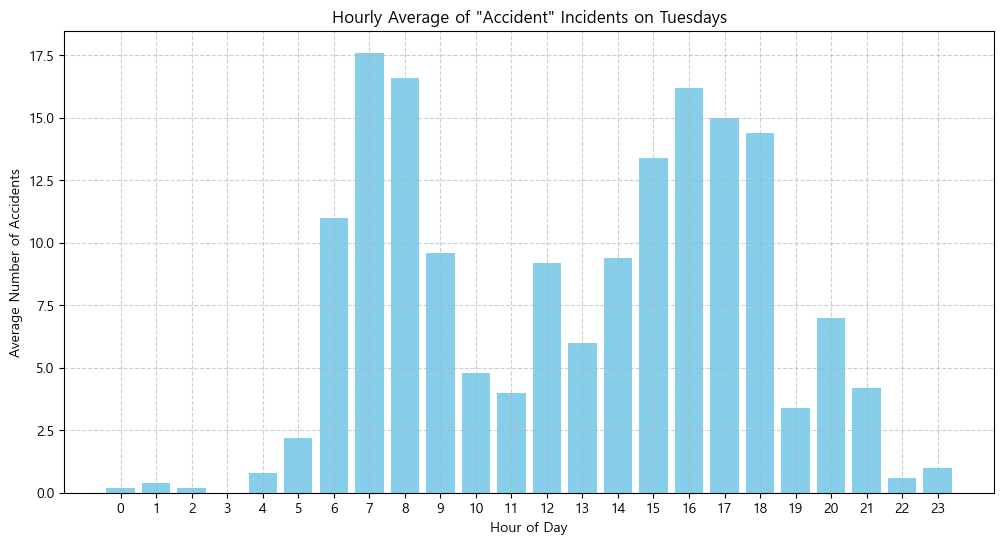

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident'].copy()

# 요일 추가 (0=월요일, 6=일요일)
accidents['day_of_week'] = accidents['createtime'].dt.dayofweek

# 수요일(2) 데이터만 필터링
tuesday_accidents = accidents[accidents['day_of_week'] == 1]

# 시간 추가
tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour

# 화요일의 주 수 계산
num_weeks = tuesday_accidents['createtime'].dt.isocalendar().week.nunique()

# 시간별 평균 사건 수 계산
hourly_tuesday_avg = tuesday_accidents.groupby(['hour']).size() / num_weeks

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_tuesday_avg.index, hourly_tuesday_avg.values, color='skyblue')
plt.title('Hourly Average of "Accident" Incidents on Tuesdays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))  # 0-23시까지의 시간대를 표시
plt.show()


## 수요일에 대해서만 데이터를 필터링하여 1시간 간격으로 시간별 사건 수를 박스플롯

C:\Users\khds0\AppData\Local\Temp\ipykernel_19184\4113741543.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour


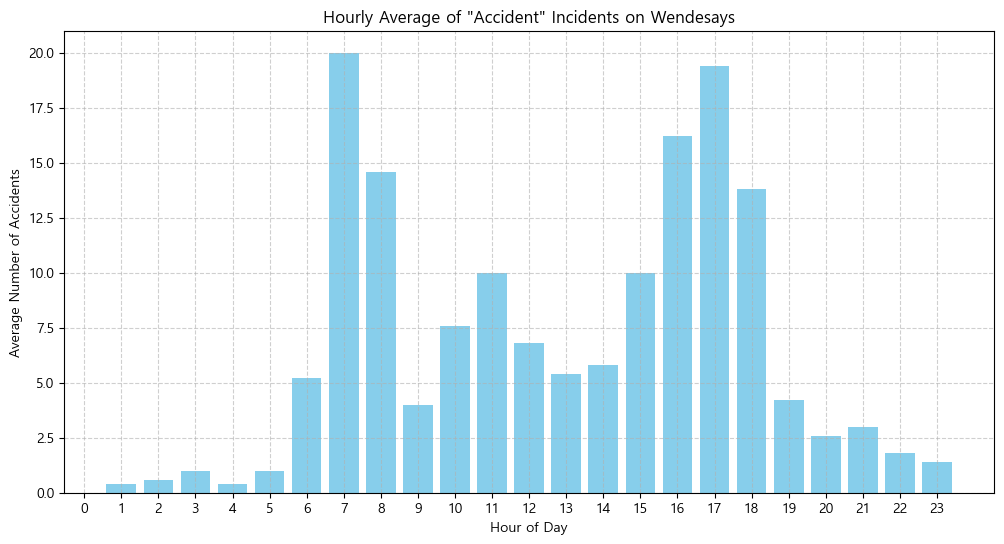

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident'].copy()

# 요일 추가 (0=월요일, 6=일요일)
accidents['day_of_week'] = accidents['createtime'].dt.dayofweek

# 수요일(2) 데이터만 필터링
tuesday_accidents = accidents[accidents['day_of_week'] == 2]

# 시간 추가
tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour

# 화요일의 주 수 계산
num_weeks = tuesday_accidents['createtime'].dt.isocalendar().week.nunique()

# 시간별 평균 사건 수 계산
hourly_tuesday_avg = tuesday_accidents.groupby(['hour']).size() / num_weeks

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_tuesday_avg.index, hourly_tuesday_avg.values, color='skyblue')
plt.title('Hourly Average of "Accident" Incidents on Wendesays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))  # 0-23시까지의 시간대를 표시
plt.show()


## 목요일에 대해서만 데이터를 필터링하여 1시간 간격으로 시간별 사건 수를 박스플롯

C:\Users\khds0\AppData\Local\Temp\ipykernel_19184\1167980949.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour


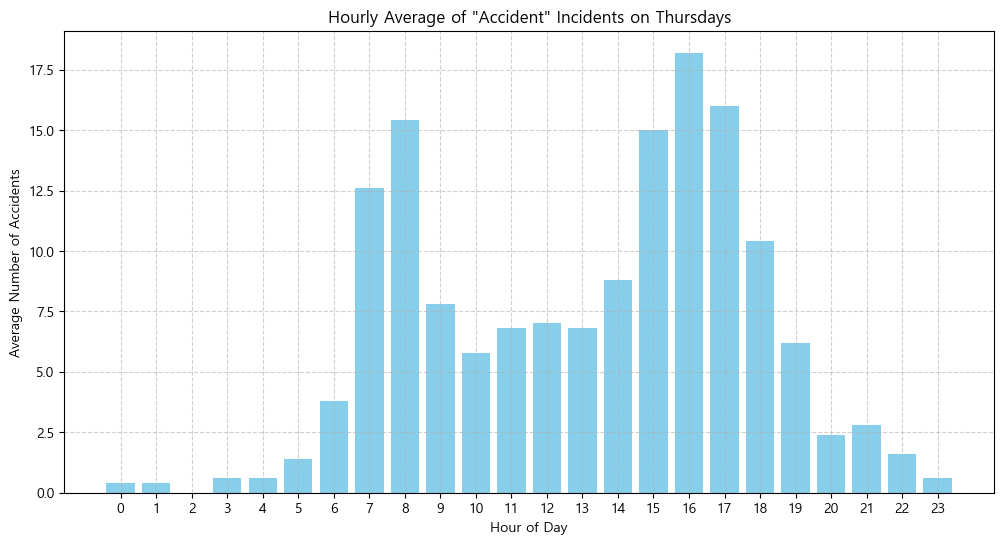

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 'Accident' 이벤트 타입만 필터링
accidents = df[df['eventtype'] == 'Accident'].copy()

# 요일 추가 (0=월요일, 6=일요일)
accidents['day_of_week'] = accidents['createtime'].dt.dayofweek

# 목요일(3) 데이터만 필터링
tuesday_accidents = accidents[accidents['day_of_week'] == 3]

# 시간 추가
tuesday_accidents['hour'] = tuesday_accidents['createtime'].dt.hour

# 화요일의 주 수 계산
num_weeks = tuesday_accidents['createtime'].dt.isocalendar().week.nunique()

# 시간별 평균 사건 수 계산
hourly_tuesday_avg = tuesday_accidents.groupby(['hour']).size() / num_weeks

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_tuesday_avg.index, hourly_tuesday_avg.values, color='skyblue')
plt.title('Hourly Average of "Accident" Incidents on Thursdays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))  # 0-23시까지의 시간대를 표시
plt.show()


### 과제 2  : 시간에 따른 교통 사고 수치화 x축 시간(00시 04시 08시 12시 16시 20시 00시)(일 평균내기), y축 사건 발생 수 ( bar 차트)

In [30]:
drop_df.head()

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,2018-08-20 00:29:31


In [31]:
drop_df.isnull().sum()

eventid                 0
eventtype               0
road                  863
roaddirection           0
MaxOftrafficimpact      0
createtime              0
dtype: int64

In [32]:
# 'column_name' 열에서 널 값이 있는 행을 삭제
drop_df = drop_df.dropna(subset=['road'])
drop_df.head()


,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
5,929921,Stall,I94,3,1,2018-08-20 00:39:43


In [33]:
drop_df.isnull().sum()

eventid               0
eventtype             0
road                  0
roaddirection         0
MaxOftrafficimpact    0
createtime            0
dtype: int64

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


In [35]:
# 최대 출력할 행 수 설정
pd.set_option('display.max_rows', None)

# 최대 출력할 열 수 설정
pd.set_option('display.max_columns', None)


## 장소에 따른 사건 타입 수치화 x축 지역이름 y축 사건 타입(bar 차트)

eventtype                       Accident  Congestion  Debris  Fire  Incident  \
road                                                                           
10th St                                7           0       0     0         0   
14th St                               11           0       0     0         1   
21st St                                5           0       1     2         0   
23rd St                                1           0       0     1         0   
27th St                               10           0       0     1         0   
29th St                                7           0       0     1         0   
31st St                                6           0       0     3         0   
33rd St                                3           0       1     2         0   
9th St                                 1           0       1     0         0   
Allanson Rd                           14           0       1     5         0   
Alleghany Rd                           0

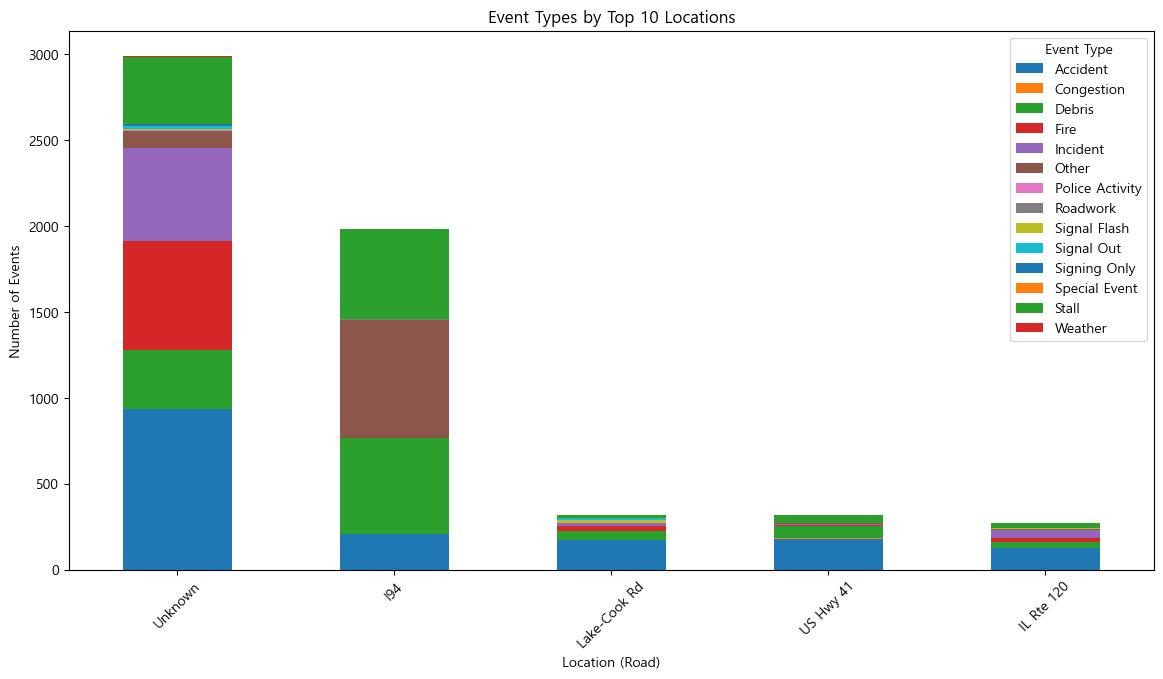

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'
df = pd.read_excel(path)

# 사건 수 계산
road_counts = df.groupby(['road', 'eventtype']).size().unstack(fill_value=0)

print(road_counts)

# 사건 수를 기준으로 상위 10개 장소 선택
top_roads = road_counts.sum(axis=1).nlargest(5).index

# 상위 10개 장소의 데이터만 필터링
filtered_data = road_counts.loc[top_roads]

# 시각화
filtered_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Event Types by Top 10 Locations')
plt.xlabel('Location (Road)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()


In [37]:
drop_df.loc[drop_df["road"] == "Unknown"]

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
6,929922,Fire,Unknown,0,3,2018-08-20 00:41:39
25,929940,Incident,Unknown,0,3,2018-08-20 06:27:39
27,929942,Fire,Unknown,0,3,2018-08-20 06:29:39
43,929955,Fire,Unknown,0,3,2018-08-20 07:19:39
49,929960,Incident,Unknown,0,2,2018-08-20 07:39:38
64,929973,Accident,Unknown,0,2,2018-08-20 08:12:39
71,929980,Fire,Unknown,0,1,2018-08-20 08:30:38
74,929982,Accident,Unknown,0,2,2018-08-20 08:35:39
76,929983,Accident,Unknown,0,2,2018-08-20 08:35:39
82,929989,Stall,Unknown,0,2,2018-08-20 08:46:39


In [38]:
# 'column_name' 열의 고유 값과 그 빈도수 계산
value_counts = df['road'].value_counts()

# 결과 출력
print(value_counts)


road
Unknown                           2988
I94                               1983
Lake-Cook Rd                       320
US Hwy 41                          319
IL Rte 120                         272
US Hwy 45                          263
IL Rte 83                          244
US Hwy 12                          232
IL Rte 21                          223
IL Rte 60                          208
Washington St                      200
IL Rte 22                          172
IL Rte 176                         170
Il Rte 132                         160
IL Rte 173                         155
Sheridan Rd                        140
IL Rte 137                         133
Rollins Rd                         131
Lewis Ave                          130
Midlothian Rd                      117
IL Rte 43                          110
Green Bay Rd                       107
IL Rte 59                          105
US Hwy 14                           95
Hunt Club Rd                        91
Grand Ave           

### 과제 3 :  장소에 따른 교통 사건 타입 수치화 x축 지역이름 y축 사건 타입(bar 차트)